This code is for testing. The main code is in `Hadron_energy_fracions.py`

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [142]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

import sys
top_path = '../'
if top_path not in sys.path:
    sys.path.append(top_path)

# import sys
# coffea_path = '/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/'
# if coffea_path not in sys.path:
#     sys.path.insert(0,coffea_path)

# ak_path = '/afs/cern.ch/user/a/anpotreb/top/JERC/local-packages/'

# if ak_path not in sys.path:
#     sys.path.insert(0,ak_path)

import hist
from hist import Hist
from coffea import util

import pickle

from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import mplhep as hep
from plotters.pltStyle import pltStyle
pltStyle(style='hep')
plt.rcParams['figure.dpi'] = 150


In [7]:
import os
figdir = 'fig/hadrons/'
if not os.path.exists(figdir):
    os.mkdir(figdir)

In [8]:
names = ["Omega+", "a-Theta0", "Theta+", "a-Sigma+=-", "a-Lambda=0", "a-Sigma-=+", "p-",  "a-n",
"KS-","pi-", "mu-" ,"el-", "el", "mu", "gamma", "K0L", "pi+", "KS0", "K+",
"n", "p", "Sigma-", "Lambda", "Sigma+", "Theta-", "Theta0", "Omega-" ]

nums = [-3334, -3322, -3312, -3222, -3122, -3112, -2212,
              -2112, -321, -211, -13, -11, 11, 13, 22, 130, 211,
              310, 321, 2112, 2212, 3112,
              3122, 3222, 3312, 3322, 3334]
# for a, b in zip(names, nums):
#     print(a+': ', b)

particle_ax = hist.axis.IntCategory(nums, name="had_type")

'''
Omega+, a-Theta0, Theta+, a-Sigma+=-, a-Lambda=0, a-Sigma-=+, p-,  a-n,
KS-,pi-, mu- ,el-, el, mu, gamma, K0L, pi+, KS0, K+,
n, p, Sigma-, Lambda, Sigma+, Theta-, Theta0, Omega- 
'''

jetpt_ax = hist.axis.Regular(30, 1, 500, overflow=False, underflow=False, name="jet_pt")
had_pt_ax = hist.axis.Regular(10, 1, 20, overflow=False, underflow=False, name="had_pt")
# Hist.new.Reg(100, 5000, 100, name="B").Double()
h = Hist(particle_ax, jetpt_ax) #, had_pt_ax)

'\nOmega+, a-Theta0, Theta+, a-Sigma+=-, a-Lambda=0, a-Sigma-=+, p-,  a-n,\nKS-,pi-, mu- ,el-, el, mu, gamma, K0L, pi+, KS0, K+,\nn, p, Sigma-, Lambda, Sigma+, Theta-, Theta0, Omega- \n'

In [39]:
events = NanoEventsFactory.from_root(
#     'file:///afs/cern.ch/work/m/mseidel/public/forAndris/testNano_PFNANO.root',
#     'file:///afs/cern.ch/work/m/mseidel/public/forAndris/testNanoCustomise_herwig7_NANO.root',
    'file:///eos/cms/store/cmst3/group/top/anpotreb/PF_Nano_Herwig2000toInf/job_0_Nano_herwig7_QCD_HT2000toInf_PF_NANO.root',
#     'file:///eos/cms/store/group/cmst3/group/top/TOP21009/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/mc_2016_ULPreVFP/230330_162057/0000/nano_mc2016pre_185.root',
    schemaclass=NanoAODSchema.v6,
#     entry_stop=5000,
    metadata={
#             "dataset": "TTBAR",
#               "xsec":semilepxsec,
             },
).events()


/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDBvLV2 in <TTree 'Events' (1939 branches) at 0x7fdf2db45970>, taking first instance
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvBV2 in <TTree 'Events' (1939 branches) at 0x7fdf2db45970>, taking first instance
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvLV2 in <TTree 'Events' (1939 branches) at 0x7fdf2db45970>, taking first instance
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch Jet_btagDeepF

In [45]:
@nb.njit
def count_2d(pdgid, pt, jetid, builder):
    ''' 
    '''
    for row in array:
        builder.begin_list()
        for x in row:
            count = 0
            for jj in range(len(row)):
                if x==row[jj]:
                    count+=1 
            builder.integer(count)
        builder.end_list()
    return builder

<Array [0, 0, 0, 0, 0, 0, ... 3, 3, 3, 3, 3, 3] type='92 * int32[parameters={"__...'>

In [ ]:
%%time
for ev_idx in range(len(events)):
    evii = events[ev_idx]
    genCandii = evii.GenCands[evii.GenJetCands.pFCandsIdx]
    jetpt_ii = evii.GenJet.pt[evii.GenJetCands.jetIdx]
    h.fill(genCandii.pdgId, jetpt_ii, weight=genCandii.pt); #genCandii.pt, weight=genCandii.pt);
    
1;    

In [9]:
s = h[:,:].stack("had_type")
sumVals = h[sum,:].values()
sumVals[sumVals==0] = 1
# s*norms
for ii in range(len(s)):
#     hist_scale = s[ii].sum()
    hist_scale= 1/sumVals
    s[ii] = s[ii]*hist_scale # if hist_scale!=0 else s[ii];
#     print("scaled sum = ", s[ii].sum())

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdf35cac7f0>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdf35cacd90>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdf35cacfa0>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdf35cc81f0>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdf35cc8400>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdf35cc8610>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdf35cc8820>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdf35cc8a00>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdf35cc8c70>, e

Text(0, 1, 'Energy fraction')

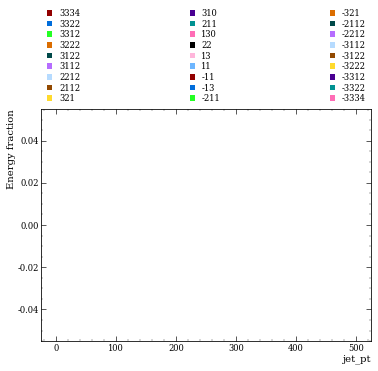

In [10]:
# h[sum,:]
# had_labels = ["$\Omega^-$"]*27
fig, ax = plt.subplots();
s.plot(stack=True, histtype="fill");
plt.ylabel("Energy fraction")
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand",ncol=3); #, labels = had_labels
hist_name = 'Efract_vs_pt'
fig.savefig(figdir+hist_name+'.png')
fig.savefig(figdir+hist_name+'.pdf')

### split in jet flavour, inclusive in pt

In [132]:
### define different hadron categories
pos_mesons = [211, 321 ]
neg_mesons = [-211, -321 ]
neut_mesons = [130, 310]
leptons = [-13, -11, 11, 13]
protons = [2212]
aprotons = [-2212]
neutrons = [2112]
aneutrons = [-2112]
sPbaryons = [3222, -3112, -3312, -3334]
sNbaryons = [-3222, 3112, 3312, 3334]
sbaryons = [3122, 3322]
asbaryons = [-3122, -3322]
gamma = [22]

### define hadron categories
categories = {"pos_mesons": [211, 321 ],
                "neg_mesons": [-211, -321 ],
                "neut_mesons": [130, 310],
                "leptons": [-13, -11, 11, 13],
                "protons": [2212],
              "a-protons": [-2212],
              "neutrons": [2112],
              "a-neutrons": [-2112],
              "sPbaryons": [3222, -3112, -3312, -3334],
              "sNbaryons": [-3222, 3112, 3312, 3334],
              "sbaryons": [3122, 3322],
              "a-sbaryons": [-3122, -3322],
              "gamma": [22]}

# categories = {"pos_mesons": [211, ],
#               "pos_s_mesons": [321, ],
#                 "neg_mesons": [-211, ],
#               "neg_s_mesons": [-321, ],
#                 "neut_mesons": [130, 310],
#                 "leptons": [-13, -11, 11, 13],
#                 "protons": [2212],
#               "a-protons": [-2212],
#               "neutrons": [2112],
#               "a-neutrons": [-2112],
#               "pos_s_baryons": [3222, -3112, -3312, -3334],
#               "neg_s_baryons": [-3222, 3112, 3312, 3334],
#               "neut_s_baryons": [3122, 3322],
#               "neut_s_anti_baryons": [-3122, -3322],
#               "gamma": [22]}

categories = {"$mes^+$": [211, ],
              "$mes_s^+$": [321, ],
                "$mes^-$": [-211, ],
              "$mes_s^-$": [-321, ],
                "$mes^0$": [130, 310],
                "$l^\pm$": [-13, -11, 11, 13],
                "$p$": [2212],
              "$\overline{p}$": [-2212],
              "$n$": [2112],
              "$\overline{n}$": [-2112],
              "$bar_s^+$": [3222, -3112, -3312, -3334],
              "$bar_s^-$": [-3222, 3112, 3312, 3334],
              "$bar_s^0$": [3122, 3322],
              "$\overline{B}_s^0$": [-3122, -3322],
              "$\gamma$": [22]}

categories = {"$\pi^+$": [211, ],
              "$\pi^-$": [-211, ],
              "$K^+$": [321, ],
              "$K^-$": [-321, ],
              "$[\pi^0; K^0_S]$": [130, 310],
              "$p$": [2212],
              "$\overline{p}$": [-2212],
              "$n$": [2112],
              "$\overline{n}$": [-2112],
              "$l^\pm$": [-13, -11, 11, 13],
              "$\gamma$": [22],
              "$[\Sigma^+; \Sigma^+; \Theta^+; \Omega^+]$": [3222, -3112, -3312, -3334],
              "$[\Sigma^-; \Sigma^-; \Theta^-; \Omega^-]$": [-3222, 3112, 3312, 3334],
              "$[\Lambda; \Theta^0]$": [3122, 3322],
              "$[\overline{\Lambda}; \overline{\Theta}^0]$": [-3122, -3322],
             }

### check for consistency
set(np.concatenate([ii for ii in categories.values()])) == set(nums)

True

In [133]:
# type_ax = hist.axis.IntCategory([5, 4, 3, 2, 1, 21, 0, -999], name="parton_flavour")

In [71]:
particle_ax = hist.axis.IntCategory(nums, name="had_type")
flavour_ax = hist.axis.IntCategory([5, -5, 4, -4, 3, -3, 2, -2, 1, -1, 21, 0, -999], name="parton_flavour")
flavour_ax = hist.axis.IntCategory([5, 4, 3, 2, 1, 21, 0, -999], name="parton_flavour")

# jetpt_ax = hist.axis.Regular(30, 1, 500, overflow=False, underflow=False, name="jet_pt")
# jeta_eta_ax = hist.axis.Variable(np.array([0, 1.3, 2.5, 3, 5]), overflow=False,
#                                  underflow=False, name="jet_eta")
had_pt_ax = hist.axis.Regular(10, 1, 20, overflow=False, underflow=False, name="had_pt")
h_good = Hist(particle_ax, flavour_ax, storage="weight")
h_bad = Hist(particle_ax, flavour_ax, storage="weight")

### Reco gen matching for samples (e.g Herwig) where gen jets do not contain partonFlavor (all 0) but reco jets do
### Then fill the histogram
### Question: Why do I reco the gen matching instead of using events.jet.matchedGen?

In [72]:
# ### To check the response
# resp_hist = Hist.new.Reg(100, 0, 5, overflow=True, underflow=True, name="response").Double()

In [15]:
# events.Jet.chHEF[0]
# events.Jet.chEmEF[0]
# events.Jet.muEF[0]
# events.Jet.hfHEF[0]
# events.Jet.neHEF[0]

In [16]:
# for EF in EFs:
#     print(f"EF:{EF} ")
#     print(events.Jet[EF].__doc__)

In [17]:
# import hist



# np.sum((events.Jet["chEmEF"] + events.Jet["chHEF"] + events.Jet["neHEF"] + events.Jet["neEmEF"] + events.Jet["muEF"])<0.993)
# np.sum((events.Jet["chEmEF"] + events.Jet["chHEF"] + events.Jet["neHEF"] + events.Jet["neEmEF"] + events.Jet["muEF"])>0.997)

In [18]:
# # ak.sum(LHE_outgoing.pdgId == 21, axis=1)
# import mplhep as hep
# from helpers import legend_str_to_filename
# import os
# fig, ax = plt.subplots()
# pt_hist = hist.new.Reg(20,0.,2.01).Double()

# # pt_hist.fill(ak.flatten((events.Jet["chEmEF"] + events.Jet["chHEF"] + events.Jet["neHEF"] + events.Jet["neEmEF"] + events.Jet["muEF"])))

# pt_hist.plot1d(histtype='fill', alpha=0.9)
# # hep.cms.label("Private work", loc=0, data=False, ax=ax, rlabel='')
# # ax.set_xlabel('Number of outgoing LHE gluons')
# # ax.set_ylabel('Events')

# # dir_name = 'plotters/fig/misc'
# # if not os.path.exists(dir_name):
# #     os.mkdir(dir_name)
    
# # figname = dir_name+'/n_gluons_ttbar'
# # ax.set_xticks([0,1,2,3])

# # figname = legend_str_to_filename(figname)
# # plt.savefig(figname+'.pdf');
# # plt.savefig(figname+'.png');
# # print(f'Figure saved: {figname}.pdf /.png')

In [19]:
from coffea import processor
class Processor(processor.ProcessorABC):
    def __init__(self):
        pass
    
    @property
    def accumulator(self):
        return self._accumulator
    
    def process(self, events):
        particle_ax = hist.axis.IntCategory(nums, name="had_type")
        flavour_ax = hist.axis.IntCategory([5, -5, 4, -4, 3, -3, 2, -2, 1, -1, 21, 0, -999], name="parton_flavour")
        flavour_ax = hist.axis.IntCategory([5, 4, 3, 2, 1, 21, 0, -999], name="parton_flavour")
        neutHF_ax  = hist.axis.Regular(20, 0, 1, name="neutHF")
        response_ax = hist.axis.Regular(20, 0, 2, name="neutHF")

        # jetpt_ax = hist.axis.Regular(30, 1, 500, overflow=False, underflow=False, name="jet_pt")
        # jeta_eta_ax = hist.axis.Variable(np.array([0, 1.3, 2.5, 3, 5]), overflow=False,
        #                                  underflow=False, name="jet_eta")
#         had_pt_ax = hist.axis.Regular(10, 1, 20, overflow=False, underflow=False, name="had_pt")
        h_bad = Hist(particle_ax, flavour_ax, storage="weight")
        h_good = Hist(particle_ax, flavour_ax, storage="weight")
        
        gen_jets = events.GenJet
        jets = events.Jet

        jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
        jets = jets[jet_gen_match_mask]


        genjet_shape = ak.num(gen_jets.partonFlavour)
        jet_shape = ak.num(jets.partonFlavour)
        partonFlavour_flat = ak.flatten(ak.zeros_like(gen_jets.partonFlavour)).to_numpy()
        toJetIdx_flat = ak.flatten(ak.ones_like(gen_jets.partonFlavour)*-1).to_numpy()

        genjet_shapecum = np.concatenate([[0], np.cumsum(genjet_shape)[:-1]])
        jet_shapecum = np.concatenate([[0], np.cumsum(jet_shape)[:-1]])
        genjetidx = ak.flatten(genjet_shapecum+jets.genJetIdx).to_numpy()
        partonFlavour_flat[genjetidx] = ak.flatten(jets.partonFlavour).to_numpy()
        toJetIdx_flat[genjetidx] = ak.flatten(np.argsort(jets.genJetIdx) ).to_numpy()
        gen_jets["partonFlavour2"] = ak.unflatten(partonFlavour_flat, genjet_shape)
        gen_jets["jetIdx"] = ak.unflatten(toJetIdx_flat, genjet_shape)

        if 'genCandsIdx' in events.GenJetCands.fields:
            genCand = events.GenCands[events.GenJetCands.genCandsIdx]
        else:
            genCand = events.GenCands[events.GenJetCands.pFCandsIdx]

        gen_jets_vCand = gen_jets[events.GenJetCands.jetIdx]
        has_mathed_reco = gen_jets_vCand["jetIdx"]>-1
        gen_jets_vCand = gen_jets_vCand[has_mathed_reco]
    
        jets = jets[gen_jets_vCand.jetIdx].pt
        jetpt = jets.pt


        ptmask = (gen_jets_vCand.pt>400) & (gen_jets_vCand.pt<1000)
        ### if masking jets with a good response and bad response
        badjet_mask = jetpt>gen_jets_vCand.pt*1.1
        goodjet_mask = (jetpt<gen_jets_vCand.pt*1.1) & (jetpt>gen_jets_vCand.pt*0.9)

        total_good_mask = ptmask & goodjet_mask
        total_bad_mask = ptmask & badjet_mask
        gen_jets_vCand_good = gen_jets_vCand[total_good_mask]
        genCand_good = genCand[total_good_mask]
        jets_good = jets[total_good_mask]
        
        gen_jets_vCand_bad = gen_jets_vCand[total_bad_mask]
        genCand_bad = genCand[total_bad_mask]
        jets_bad = jets[total_bad_mask]
#         jetpt_bad = jetpt[total_mask]
#         resp_hist.fill(ak.flatten(jetpt/gen_jets_vCand.pt).to_numpy())

        h_good.fill(ak.flatten(genCand_good.pdgId), ak.flatten(np.abs(gen_jets_vCand_good.partonFlavour2)), weight=ak.flatten(genCand_good.pt));
        h_bad.fill(ak.flatten(genCand_bad.pdgId), ak.flatten(np.abs(gen_jets_vCand_bad.partonFlavour2)), weight=ak.flatten(genCand_bad.pt));
    
        return {"h_good":h_good, "h_bad":h_bad }
    
    def postprocess(self, accumulator):
        return accumulator

In [20]:
gen_jets = events.GenJet
jets = events.Jet

jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
jets = jets[jet_gen_match_mask]

toJetIdx = ak.zeros_like(gen_jets.partonFlavour)
genjet_shape = ak.num(gen_jets.partonFlavour)
jet_shape = ak.num(jets.partonFlavour)
partonFlavour_flat = ak.flatten(ak.zeros_like(gen_jets.partonFlavour)).to_numpy()
toJetIdx_flat = ak.flatten(ak.ones_like(gen_jets.partonFlavour)*-1).to_numpy()

genjet_shapecum = np.concatenate([[0], np.cumsum(genjet_shape)[:-1]])
jet_shapecum = np.concatenate([[0], np.cumsum(jet_shape)[:-1]])
genjetidx = ak.flatten(genjet_shapecum+jets.genJetIdx).to_numpy()
partonFlavour_flat[genjetidx] = ak.flatten(jets.partonFlavour).to_numpy()
toJetIdx_flat[genjetidx] = ak.flatten(np.argsort(jets.genJetIdx) ).to_numpy()
gen_jets["partonFlavour2"] = ak.unflatten(partonFlavour_flat, genjet_shape)
gen_jets["jetIdx"] = ak.unflatten(toJetIdx_flat, genjet_shape)

if 'genCandsIdx' in events.GenJetCands.fields:
    genCand = events.GenCands[events.GenJetCands.genCandsIdx]
else:
    genCand = events.GenCands[events.GenJetCands.pFCandsIdx]

gen_jets_vCand = gen_jets[events.GenJetCands.jetIdx]
has_mathed_reco = gen_jets_vCand["jetIdx"]>-1
gen_jets_vCand = gen_jets_vCand[has_mathed_reco]

NameError: name 'events' is not defined

In [ ]:
genCand["jetIdx"] = events.GenJetCands.jetIdx

In [21]:
pt_grouped_by_jetIdx = ak.partition_by(genCand.jetIdx, genCand.pt)

AttributeError: module 'awkward' has no attribute 'partition_by'

In [150]:
jets = jets[gen_jets_vCand.jetIdx]

In [167]:
# dir(gen_jets)

In [177]:
gen_jets = events.GenJet
jets = events.Jet


In [181]:
jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
jets = jets[jet_gen_match_mask]

In [128]:
from coffea import processor
class Processor(processor.ProcessorABC):
    def __init__(self):
        pass
    
    @property
    def accumulator(self):
        return self._accumulator
    
    def process(self, events):
        particle_ax = hist.axis.IntCategory(nums, name="had_type")
        flavour_ax = hist.axis.IntCategory([5, -5, 4, -4, 3, -3, 2, -2, 1, -1, 21, 0, -999], name="parton_flavour")
        flavour_ax = hist.axis.IntCategory([5, 4, 3, 2, 1, 21, 0, -999], name="parton_flavour")
        neutHF_ax  = hist.axis.Regular(20, 0, 1, name="neutHF")
        response_ax = hist.axis.Regular(20, 0, 2, name="neutHF")

        # jetpt_ax = hist.axis.Regular(30, 1, 500, overflow=False, underflow=False, name="jet_pt")
        # jeta_eta_ax = hist.axis.Variable(np.array([0, 1.3, 2.5, 3, 5]), overflow=False,
        #                                  underflow=False, name="jet_eta")
#         had_pt_ax = hist.axis.Regular(10, 1, 20, overflow=False, underflow=False, name="had_pt")
        h_bad = Hist(particle_ax, flavour_ax, neutHF_ax, storage="weight")
        h_good = Hist(particle_ax, flavour_ax, neutHF_ax, storage="weight")
        
        h_bad_NHF = Hist(particle_ax, flavour_ax, neutHF_ax, storage="weight")
        h_good_NHF = Hist(particle_ax, flavour_ax, neutHF_ax, storage="weight")
        
        gen_jets = events.GenJet
        jets = events.Jet

        jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
        jets = jets[jet_gen_match_mask]

        ### genjets don't have the parton flavor stored, so we copy jets.partonFlavor to gen_gets.partonFlavour2.
        ### The index from jets to gen_jets is available but here also the index from gen_jets to jets is needed.
        genjet_shape = ak.num(gen_jets.partonFlavour)
        partonFlavour_flat = ak.flatten(ak.zeros_like(gen_jets.partonFlavour)).to_numpy()
        toJetIdx_flat = ak.flatten(ak.ones_like(gen_jets.partonFlavour)*-1).to_numpy()

        genjet_shapecum = np.concatenate([[0], np.cumsum(genjet_shape)[:-1]])
        genjetidx = ak.flatten(genjet_shapecum+jets.genJetIdx).to_numpy()
        partonFlavour_flat[genjetidx] = ak.flatten(jets.partonFlavour).to_numpy()
        toJetIdx_flat[genjetidx] = ak.flatten(np.argsort(jets.genJetIdx) ).to_numpy()
        gen_jets["partonFlavour2"] = ak.unflatten(partonFlavour_flat, genjet_shape)
        gen_jets["jetIdx"] = ak.unflatten(toJetIdx_flat, genjet_shape)

        ### select the gen particles
        if 'genCandsIdx' in events.GenJetCands.fields:
            genCand = events.GenCands[events.GenJetCands.genCandsIdx]
        else:
            genCand = events.GenCands[events.GenJetCands.pFCandsIdx]

        ### select the gen particles
        gen_jets_vCand = gen_jets[events.GenJetCands.jetIdx]
        has_mathed_reco = gen_jets_vCand["jetIdx"]>-1
        gen_jets_vCand = gen_jets_vCand[has_mathed_reco]
    
        jets = jets[gen_jets_vCand.jetIdx]
        jetpt = jets.pt


        ptmask = (gen_jets_vCand.pt>400) & (gen_jets_vCand.pt<1000)
        ### if masking jets with a good response and bad response
        badjet_mask = jetpt>gen_jets_vCand.pt*1.1
        goodjet_mask = (jetpt<gen_jets_vCand.pt*1.1) & (jetpt>gen_jets_vCand.pt*0.9)

        total_good_mask = ptmask & goodjet_mask
        total_bad_mask = ptmask & badjet_mask
        gen_jets_vCand_good = gen_jets_vCand[total_good_mask]
        genCand_good = genCand[total_good_mask]
        jets_good = jets[total_good_mask]
        
        gen_jets_vCand_bad = gen_jets_vCand[total_bad_mask]
        genCand_bad = genCand[total_bad_mask]
        jets_bad = jets[total_bad_mask]
#         jetpt_bad = jetpt[total_mask]
#         resp_hist.fill(ak.flatten(jetpt/gen_jets_vCand.pt).to_numpy())

        h_good.fill(ak.flatten(genCand_good.pdgId), ak.flatten(np.abs(gen_jets_vCand_good.partonFlavour2)), ak.flatten(jets_good["neHEF"] + jets_good["neEmEF"]), weight=ak.flatten(genCand_good.pt));
        h_bad.fill(ak.flatten(genCand_bad.pdgId), ak.flatten(np.abs(gen_jets_vCand_bad.partonFlavour2)), ak.flatten(jets_bad["neHEF"] + jets_bad["neEmEF"]), weight=ak.flatten(genCand_bad.pt));
    
        return {"h_good":h_good, "h_bad":h_bad }
    
    def postprocess(self, accumulator):
        return accumulator

In [129]:
# fileslist

In [23]:
out = util.load('../out/NHF_NR_processor_L5_.coffea')
util.load('HadronEfractions_Herwig.coffea')

NameError: name 'util' is not defined

In [130]:
# xrootdstr = 'file:///eos/cms/store/group/cmst3/group/top/TOP21009/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/mc_2016_ULPreVFP/230330_162057/0000/'
xrootdstr = 'file://'
# xrootdstr = 'file:///eos/home-a/anpotreb/lxplus/JERC/CMSSW10634_PFNano/src/PhysicsTools/PFNano/test/outroots/'
def txt2filesls(dataset_name):
    with open(dataset_name) as f:
        rootfiles = f.read().split()
        fileslist = [xrootdstr + file for file in rootfiles]
    return fileslist

In [131]:
Nfiles = 1
# dataset = 'fileNames/PFNanoTTToSemiLepPowPy.txt'
dataset = 'fileNames/PFNanoQCD_MG_Her.txt'
# dataset = 'fileNames/PFNanoTTToSemiLepPowHer.txt'
fileslist = txt2filesls(dataset)[:Nfiles]
# fileslist = ['file:///eos/cms/store/group/cmst3/group/top/TOP21009/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/mc_2016_ULPreVFP/230330_162057/0000/nano_mc2016pre_185.root']
# fileslist = ['file:///eos/cms/store/cmst3/group/top/anpotreb/PF_Nano_Herwig2000toInf/job_0_Nano_herwig7_QCD_HT2000toInf_PF_NANO.root']
# fileslist = ['file:///eos/cms/store/cmst3/group/top/anpotreb/PFNano_QCD_2000toInf_MGPy/job_0_Nano_herwig7_JME_PF_NANO.root']
filesets = {'dataset1': {"files": fileslist, "metadata": {"xsec": 1}}}

In [132]:
UsingDaskExecutor = True
CoffeaCasaEnv = False
CERNCondorCluster = False

In [133]:
if(UsingDaskExecutor and not CoffeaCasaEnv):
    from dask.distributed import Client 
 # Dask set up for LPC only 
    if not CERNCondorCluster:
        client = Client()
        client.get_versions(check=True)
#         client.nanny = False

    else:
        from dask_lxplus import CernCluster
        import socket

        cluster = CernCluster(
# #             memory=config.run_options['mem_per_worker'],
# #             disk=config.run_options.get('disk_per_worker', "20GB"),
#             env_extra=env_extra,
            cores = 1,
            memory = '4000MB',
            disk = '2000MB',
            death_timeout = '60',
            lcg = True,
            nanny = False,
            container_runtime = 'none',
            log_directory = '/eos/user/a/anpotreb/condor/log',
            scheduler_options = {
                'port': 8786,
                'host': socket.gethostname(),
            },
            job_extra = {
                'MY.JobFlavour': '"longlunch"',
#                 'transfer_input_files': '/afs/cern.ch/user/a/anpotreb/top/JERC/JMECoffea/count_2d.py',
            },
        )
        cluster.adapt(minimum=2, maximum=200)
        cluster.scale(8)
        client = Client(cluster)
    
#     client.upload_file('CoffeaJERCProcessor'+tag_Lx+'.py')
#     client.upload_file('count_2d.py')

    client

/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/distributed/node.py:169: ResourceWarning: unclosed <socket.socket fd=142, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('0.0.0.0', 0)>
  raise
/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35435 instead
  warnings.warn(


{'scheduler': {'host': {'python': '3.9.12.final.0',
   'python-bits': 64,
   'OS': 'Linux',
   'OS-release': '5.14.0-362.18.1.el9_3.x86_64',
   'machine': 'x86_64',
   'processor': 'x86_64',
   'byteorder': 'little',
   'LC_ALL': 'None',
   'LANG': 'en_US.UTF-8'},
  'packages': {'python': '3.9.12.final.0',
   'dask': '2023.7.1',
   'distributed': '2023.7.1',
   'msgpack': '1.0.5',
   'cloudpickle': '2.2.0',
   'tornado': '6.1',
   'toolz': '0.11.2',
   'numpy': '1.23.5',
   'pandas': '1.5.3',
   'lz4': '4.0.0'}},
 'workers': {'tcp://127.0.0.1:33331': {'host': {'python': '3.9.12.final.0',
    'python-bits': 64,
    'OS': 'Linux',
    'OS-release': '5.14.0-362.18.1.el9_3.x86_64',
    'machine': 'x86_64',
    'processor': 'x86_64',
    'byteorder': 'little',
    'LC_ALL': 'None',
    'LANG': 'en_US.UTF-8'},
   'packages': {'python': '3.9.12.final.0',
    'dask': '2023.7.1',
    'distributed': '2023.7.1',
    'msgpack': '1.0.5',
    'cloudpickle': '2.2.0',
    'tornado': '6.1',
    'toolz'

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:35435/status,
Dashboard: http://127.0.0.1:35435/status,Workers: 5
Total threads: 10,Total memory: 28.42 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35871,Workers: 5
Dashboard: http://127.0.0.1:35435/status,Total threads: 10
Started: Just now,Total memory: 28.42 GiB
Comm: tcp://127.0.0.1:38711,Total threads: 2
Dashboard: http://127.0.0.1:46123/status,Memory: 5.68 GiB
Nanny: tcp://127.0.0.1:45143,


In [134]:
# cluster = CernCluster(
# # #             memory=config.run_options['mem_per_worker'],
# # #             disk=config.run_options.get('disk_per_worker', "20GB"),
# #             env_extra=env_extra,
#     cores = 1,
#     memory = '4000MB',
#     disk = '2000MB',
#     death_timeout = '60',
#     lcg = True,
#     nanny = False,
#     container_runtime = 'none',
#     log_directory = '/eos/user/a/anpotreb/condor/log',
#     scheduler_options = {
#         'port': 8786,
#         'host': socket.gethostname(),
#     },
#     job_extra = {
#         'MY.JobFlavour': '"longlunch"',
# #                 'transfer_input_files': '/afs/cern.ch/user/a/anpotreb/top/JERC/JMECoffea/count_2d.py',
#     },
# )
# cluster.adapt(minimum=2, maximum=200)
# cluster.scale(8)
# client = Client(cluster)

In [135]:
# socket.gethostname()

In [25]:
import time
from numpy.random import RandomState
load_preexisting = True
from coffea import processor, util

outname = 'HadronEfractions_QCD_Pythia_with_NHEF.coffea'
# outname = 'HadronEfractions_Herwig.coffea'

In [137]:
# len(filesets['dataset1']['files'])

In [138]:
tstart = time.time()

outputs_unweighted = {}

seed = 1234577890
prng = RandomState(seed)
chunksize = 10000
maxchunks = 3

if not load_preexisting:
    if not UsingDaskExecutor:
        chosen_exec = 'futures'
        output = processor.run_uproot_job(filesets,
                                          treename='Events',
                                          processor_instance=Processor(),
                                          executor=processor.iterative_executor,
    #                                        executor=processor.futures_executor,
                                          executor_args={
                                              'skipbadfiles':True,
                                              'schema': NanoAODSchema, #BaseSchema
                                              'workers': 2},
                                          chunksize=chunksize,
                                          maxchunks=maxchunks)
    else:
        chosen_exec = 'dask'
        output = processor.run_uproot_job(filesets,
                                          treename='Events',
                                          processor_instance=Processor(),
                                          executor=processor.dask_executor,
                                          executor_args={
                                              'client': client,
                                              'skipbadfiles':True,
                                              'schema': NanoAODSchema, #BaseSchema
                                              'xrootdtimeout': 60,
                                              'retries': 2,
#                                               'workers': 2
                                          },
                                          chunksize=chunksize,
                                          maxchunks=maxchunks)

    elapsed = time.time() - tstart
    print("Processor finished. Time elapsed: ", elapsed)
#     outputs_unweighted[name] = output
    print("Saving the output histograms under: ", outname)
    util.save(output, outname)
#     outputs_unweighted[name] = output
else:
    output = util.load(outname)
    print("Loaded histograms from: ", outname)

#### Attempt to prevent the error when the cluster closes. Doesn't always work.
if UsingDaskExecutor:
    client.close()
    time.sleep(5)
    if CERNCondorCluster or CoffeaCasaEnv:
        cluster.close()

[####################                    ] | 50% Completed |  2.8s

/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDBvLV2 in <TTree 'Events' (1939 branches) at 0x7f6c0db855e0>, taking first instance
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvBV2 in <TTree 'Events' (1939 branches) at 0x7f6c0db855e0>, taking first instance
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvLV2 in <TTree 'Events' (1939 branches) at 0x7f6c0db855e0>, taking first instance
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch Jet_btagDeepF

Processor finished. Time elapsed:  5.179550409317017mpleted |  5.2s
Saving the output histograms under:  HadronEfractions_QCD_Pythia_with_NHEF.coffea


In [28]:
# %%time
# gen_jets = events.GenJet
# jets = events.Jet

# jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
# jets = jets[jet_gen_match_mask]

# toJetIdx = ak.zeros_like(gen_jets.partonFlavour)
# genjet_shape = ak.num(gen_jets.partonFlavour)
# jet_shape = ak.num(jets.partonFlavour)
# partonFlavour_flat = ak.flatten(ak.zeros_like(gen_jets.partonFlavour)).to_numpy()
# toJetIdx_flat = ak.flatten(ak.ones_like(gen_jets.partonFlavour)*-1).to_numpy()

# genjet_shapecum = np.concatenate([[0], np.cumsum(genjet_shape)[:-1]])
# jet_shapecum = np.concatenate([[0], np.cumsum(jet_shape)[:-1]])
# genjetidx = ak.flatten(genjet_shapecum+jets.genJetIdx).to_numpy()
# partonFlavour_flat[genjetidx] = ak.flatten(jets.partonFlavour).to_numpy()
# toJetIdx_flat[genjetidx] = ak.flatten(np.argsort(jets.genJetIdx) ).to_numpy()
# gen_jets["partonFlavour2"] = ak.unflatten(partonFlavour_flat, genjet_shape)
# gen_jets["jetIdx"] = ak.unflatten(toJetIdx_flat, genjet_shape)

# if 'genCandsIdx' in events.GenJetCands.fields:
#     genCand = events.GenCands[events.GenJetCands.genCandsIdx]
# else:
#     genCand = events.GenCands[events.GenJetCands.pFCandsIdx]
# gen_jets_vCand = gen_jets[events.GenJetCands.jetIdx]

# # matched_jet_exists = gen_jets_vCand.jetIdx>-1
# has_mathed_reco = gen_jets_vCand["jetIdx"]>-1
# gen_jets_vCand = gen_jets_vCand[has_mathed_reco]
# jetpt = jets[gen_jets_vCand.jetIdx].pt


# ptmask = (gen_jets_vCand.pt>400) & (gen_jets_vCand.pt<1000)
# ### if masking jets with a good response and bad response
# funnyjet_mask = jetpt>gen_jets_vCand.pt*1.1
# goodjet_mask = (jetpt<gen_jets_vCand.pt*1.1) & (jetpt>gen_jets_vCand.pt*0.9)

# total_mask = ptmask & goodjet_mask # funnyjet_mask #
# gen_jets_vCand = gen_jets_vCand[total_mask]
# genCand = genCand[total_mask]
# jetpt = jetpt[total_mask]
# resp_hist.fill(ak.flatten(jetpt/gen_jets_vCand.pt).to_numpy())

# h.fill(ak.flatten(genCand.pdgId), ak.flatten(np.abs(gen_jets_vCand.partonFlavour2)), weight=ak.flatten(genCand.pt));





In [29]:
# output = util.load(outname)

In [133]:
h = output['h_bad']+output['h_good']

In [192]:
# %%time

# matchedJets = ak.cartesian([events.GenJet, events.Jet])
# # matchedJets_unfl = ak.unflatten(matchedJets,[len(events.Jet)]*len(events.GenJet))
# dr = matchedJets.slot0.delta_r(matchedJets.slot1)
# matchedJets = matchedJets[dr < 0.2]

# gen_jets = matchedJets.slot0
# jets = matchedJets.slot1
# gen_jets["partonFlavour2"] = jets["partonFlavour"]
# # matched
# # genjet_idx, jet_idx = np.nonzero(dr<0.2)
# ### this assumes that all the leading gen jets are matched to a reco jet, so the indexing is the same
# ### which could be not true sometimes.
# ### A better option would be to track index of the gen_jet in the initial events.GenJet.
# genCand = events.GenCands[events.GenJetCands.pFCandsIdx]
# # g_jets = gen_jets[events.GenJetCands.jetIdx]
# # r_jets = jets[events.GenJetCands.jetIdx]

# # jetpt_mask = jet.pt>30

# # good_response_mask = jet.pt
# # genCand = genCand[jetpt_mask]
# # g_jets = g_jets[jetpt_mask]
# # r_jets = r_jets[jetpt_mask]

# # fannyjet_mask = r_jets.pt>g_jets.pt*1.1
# # goodjet_mask = (r_jets.pt<g_jets.pt[0]*1.1) & (r_jets.pt>g_jets.pt*0.9)

# # h.fill(ak.flatten(genCand.pdgId), ak.flatten(g_jets.partonFlavour2), weight=ak.flatten(genCand.pt));


2023-05-02 08:28:43,993 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDBvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d1b1bad90>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvBV2 in <TTree 'Events' (1589 branches) at 0x7f6d1b1bad90>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d1b1bad90>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch Jet_btagDeepFlavC in <TTree 'Events' (1589 bran

/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDBvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d27fbd820>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvBV2 in <TTree 'Events' (1589 branches) at 0x7f6d27fbd820>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d27fbd820>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch Jet_btagDeepFlavC in <TTree 'Events' (1589 branches) at 0x7f6d27fbd820>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/ma

2023-05-02 08:29:15,280 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDBvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d1dd77970>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvBV2 in <TTree 'Events' (1589 branches) at 0x7f6d1dd77970>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d1dd77970>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch Jet_btagDeepFlavC in <TTree 'Events' (1589 bran

2023-05-02 08:29:33,526 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDBvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d1d594730>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvBV2 in <TTree 'Events' (1589 branches) at 0x7f6d1d594730>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d1d594730>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch Jet_btagDeepFlavC in <TTree 'Events' (1589 bran

/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDBvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d31862220>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvBV2 in <TTree 'Events' (1589 branches) at 0x7f6d31862220>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d31862220>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch Jet_btagDeepFlavC in <TTree 'Events' (1589 branches) at 0x7f6d31862220>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/ma

/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDBvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d201f9430>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvBV2 in <TTree 'Events' (1589 branches) at 0x7f6d201f9430>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d201f9430>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch Jet_btagDeepFlavC in <TTree 'Events' (1589 branches) at 0x7f6d201f9430>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/ma

#### compare all hadron types

In [187]:
# s = h[:,:].stack("had_type")
# sumVals = h[sum,:].values()
# sumVals[sumVals==0] = 1
# for ii in range(len(s)):
# #     hist_scale = s[ii].sum()
#     hist_scale= 1/sumVals
#     s[ii] = s[ii]*hist_scale # if hist_scale!=0 else s[ii];

In [188]:
# # h[sum,:]
# # had_labels = ["$\Omega^-$"]*27
# s.plot(stack=True, histtype="fill");
# plt.ylabel("Energy fraction")
# plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand",ncol=3); #, labels = had_labels

/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDBvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d1f93cbb0>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvBV2 in <TTree 'Events' (1589 branches) at 0x7f6d1f93cbb0>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch FatJet_btagDDCvLV2 in <TTree 'Events' (1589 branches) at 0x7f6d1f93cbb0>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/mapping/uproot.py:86: UserWarning: Found duplicate branch Jet_btagDeepFlavC in <TTree 'Events' (1589 branches) at 0x7f6d1f93cbb0>, taking first instance
  warnings.warn(
/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/coffea/nanoevents/ma

In [44]:
# import pickle 

# # with open("hadrons/Pythia_bad_jets.pkl", "wb") as f:
# #     pickle.dump(h, f)

# # with open("hadrons/Pythia.pkl", "rb") as f:
# #     h = pickle.load(f)
# # Py = True

with open("hadrons/Herwig.pkl", "rb") as f:
    h = pickle.load(f)
Py = False

In [53]:
h

Hist(
  IntCategory([-3334, -3322, -3312, -3222, -3122, -3112, -2212, -2112, -321, -211, -13, -11, 11, 13, 22, 130, 211, 310, 321, 2112, 2212, 3112, 3122, 3222, 3312, 3322, 3334], name='had_type'),
  IntCategory([5, -5, 4, -4, 3, -3, 2, -2, 1, -1, 21, 0, -100], name='parton_flavour'),
  storage=Double()) # Sum: 3394398.3115234375

In [46]:
# h = output['h_bad']

In [47]:
# Py = False

In [220]:
# out['h_good']

In [48]:
# h = out['h_good']

In [49]:
# hist_stack

In [50]:
# h_HER

In [51]:
# h = h_HER
# Py = False

In [140]:
# # my_stack['$mes^+$'].axes
# from collections import OrderedDict
# reversed(list(my_stack.items()))

In [134]:
my_stack = {}
cat_keys = categories.keys()
for key in cat_keys:
#     complex_cat = map(lambda a: complex(a)*1j, [3112, 3122])
    complex_cat = [complex(valii)*1j for valii in categories[key]]
    hist_cat = h[complex_cat,:].project('parton_flavour') #.project('pt_gen')
    my_stack[key] = hist_cat
    
# keys = np.invert(my_stack.keys())
my_stack = OrderedDict(reversed(list(my_stack.items())))
# my_stack = {v: k for k, v in my_stack.items()}
hist_stack = hist.Stack.from_dict(my_stack)

/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


In [135]:
s = h[:,:].stack("had_type")
sumVals = h[sum,:].values()
sumVals[sumVals==0] = 1
# s*norms
for ii in range(len(s)):
#     hist_scale = s[ii].sum()
    hist_scale= 1/sumVals
    s[ii] = s[ii]*hist_scale # if hist_scale!=0 else s[ii];
#     print("scaled sum = ", s[ii].sum())

In [136]:
rc_top_old = plt.rcParams['figure.subplot.top']
plt.rcParams['figure.subplot.top'] = 0.63
plt.rcParams['figure.figsize'] = [4.2, 4.3] 

Figure saved =  fig/hadrons/tot_Her.png


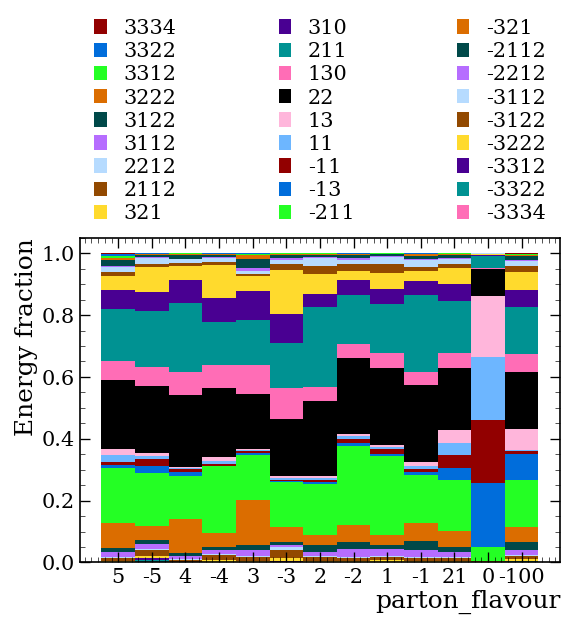

In [137]:
# h[sum,:]
# had_labels = ["$\Omega^-$"]*27
fig, ax = plt.subplots();
s.plot(stack=True, histtype="fill");
plt.ylabel("Energy fraction")
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand",ncol=3); #, labels = had_labels
hist_name = "tot"
hist_name+='' if Py else '_Her'
fig.savefig(figdir+hist_name+'.png')
fig.savefig(figdir+hist_name+'.pdf')
print("Figure saved = ", figdir+hist_name+'.png')
1;

In [138]:
# s = h[:,:].stack("had_type")
s = hist_stack
sumVals = h[sum,:].values()
sumVals[sumVals==0] = 1
# s*norms
for ii in range(len(s)):
#     hist_scale = s[ii].sum()
    hist_scale= 1/sumVals
    s[ii] = s[ii]*hist_scale # if hist_scale!=0 else s[ii];
#     print("scaled sum = ", s[ii].sum())

In [157]:
s.axes[0]

IntCategory([5, -5, 4, -4, 3, -3, 2, -2, 1, -1, 21, 0, -100], name='parton_flavour')

Figure saved =  fig/hadrons/tot_cat_Her.png


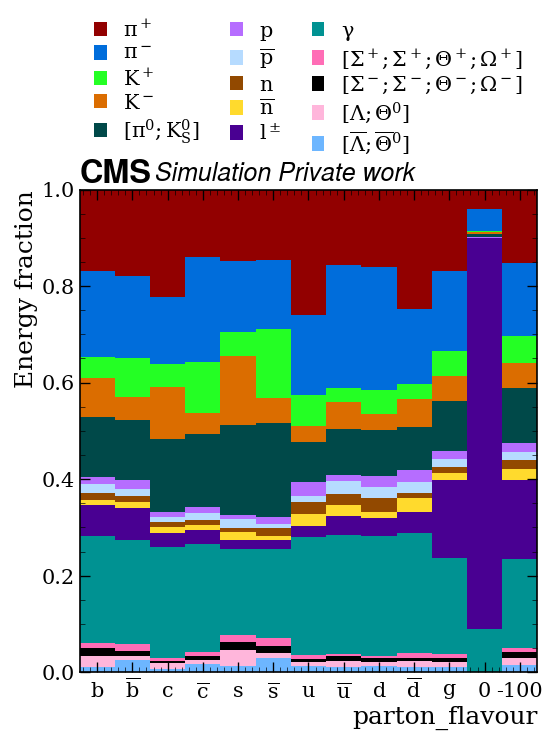

In [181]:
# h[sum,:]
# had_labels = ["$\Omega^-$"]*27
fig, ax = plt.subplots();
s.plot(stack=True, histtype="fill");
plt.ylabel("Energy fraction")
ax.set_ylim(0,1)
plt.legend(bbox_to_anchor=(0, 1.04, 1, 0), loc="lower left", mode="expand",ncol=3); #, labels = had_labels
hist_name = "tot_cat"
hist_name+='' if Py else '_Her'
ax.set_xlim(-0,13)
ax.set_xticklabels(['$b$', '$\overline{b}$', '$c$', '$\overline{c}$', '$s$', '$\overline{s}$', '$u$', '$\overline{u}$', '$d$', '$\overline{d}$', '$g$', 0, -100])
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
# Adjust the position of specific tick labels
for i, label in enumerate(xticklabels):
#     xticks[i]
    if not xticks[i] in [1.5, 9.5]:  # Specify the x-tick values you want to move
        label.set_y(-0.01)  # Adjust this value as needed        
# Redraw the plot with adjusted tick labels
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

hep.cms.label("Private work", loc=0, data=False, ax=ax, rlabel='')
fig.savefig(figdir+hist_name+'.png')
fig.savefig(figdir+hist_name+'.pdf')
print("Figure saved = ", figdir+hist_name+'.png')
1;

[Text(0.0, 0, '0'),
 Text(1.0, 0, '1'),
 Text(2.0, -0.1, '2'),
 Text(3.0, 0, '3'),
 Text(4.0, -0.1, '4'),
 Text(5.0, 0, '5'),
 Text(6.0, 0, '6')]

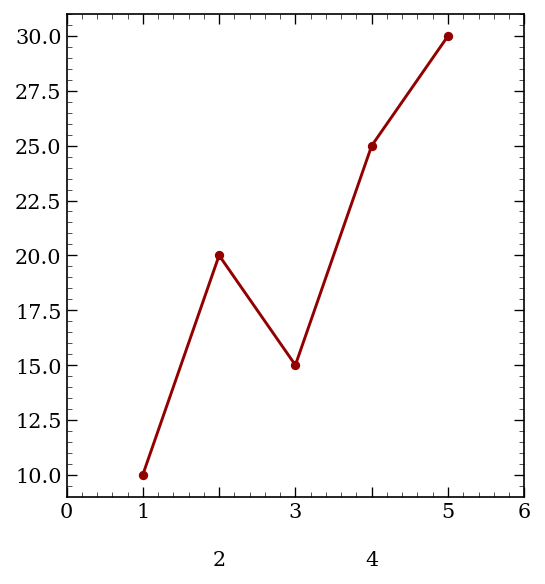

In [171]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Get the tick labels
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()

# Adjust the position of specific tick labels
for i, label in enumerate(xticklabels):
    if xticks[i] in [2, 4]:  # Specify the x-tick values you want to move
        label.set_y(-0.1)  # Adjust this value as needed

# Redraw the plot with adjusted tick labels
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

plt.show()

In [130]:
plt.rcParams['figure.subplot.top'] = rc_top_old

Figure saved =  fig/hadrons/$[\overline{\Lambda}; \overline{\Theta}^0]$_Her.png
Figure saved =  fig/hadrons/$[\Lambda; \Theta^0]$_Her.png
Figure saved =  fig/hadrons/$[\Sigma^-; \Sigma^-; \Theta^-; \Omega^-]$_Her.png
Figure saved =  fig/hadrons/$[\Sigma^+; \Sigma^+; \Theta^+; \Omega^+]$_Her.png
Figure saved =  fig/hadrons/$\overline{n}$_Her.png
Figure saved =  fig/hadrons/$n$_Her.png
Figure saved =  fig/hadrons/$\overline{p}$_Her.png
Figure saved =  fig/hadrons/$p$_Her.png
Figure saved =  fig/hadrons/$\gamma$_Her.png
Figure saved =  fig/hadrons/$l^\pm$_Her.png
Figure saved =  fig/hadrons/$[\pi^0; K^0_S]$_Her.png
Figure saved =  fig/hadrons/$K^-$_Her.png
Figure saved =  fig/hadrons/$K^+$_Her.png
Figure saved =  fig/hadrons/$\pi^-$_Her.png
Figure saved =  fig/hadrons/$\pi^+$_Her.png


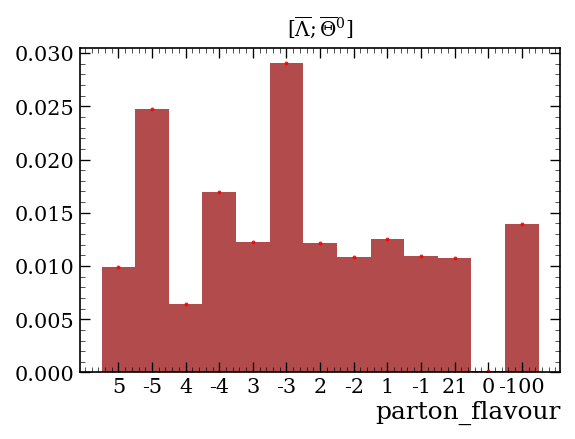

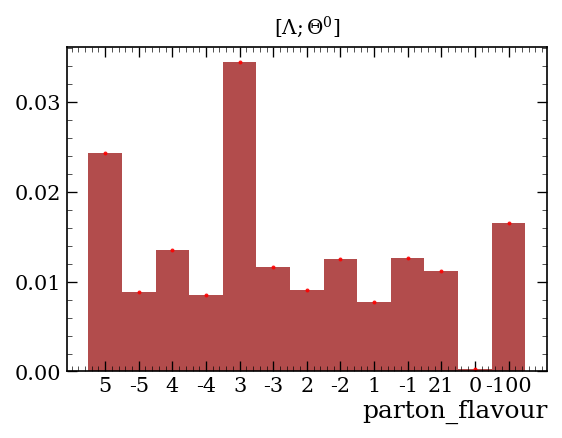

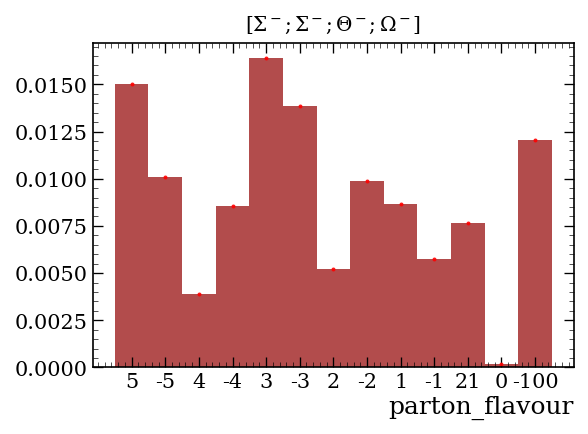

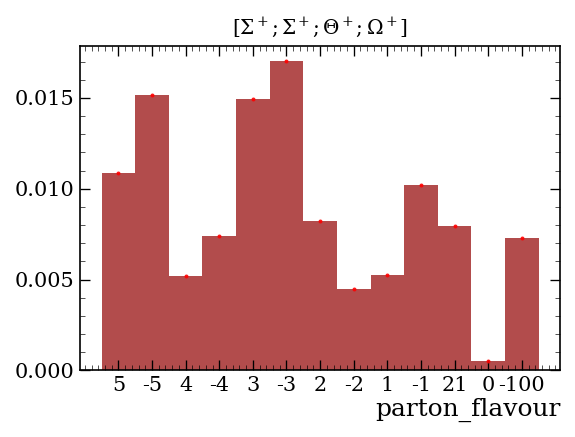

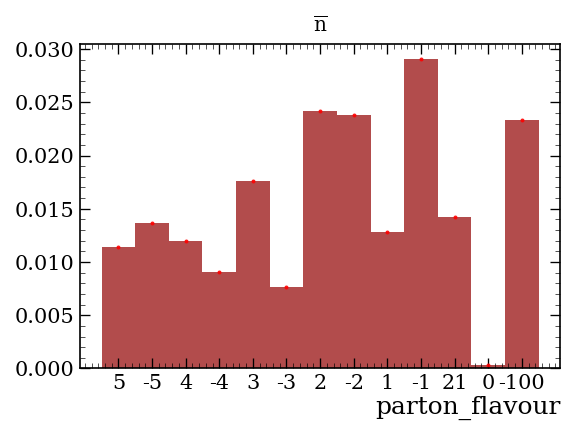

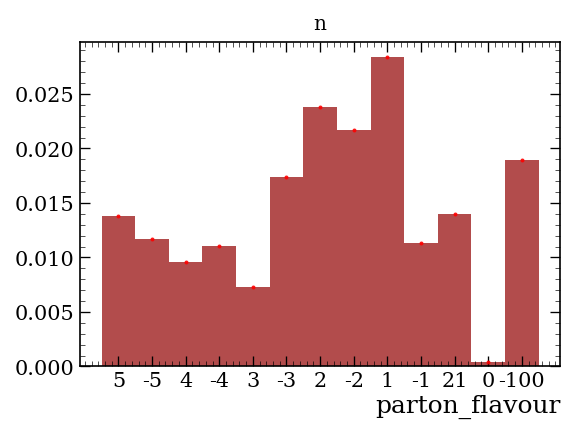

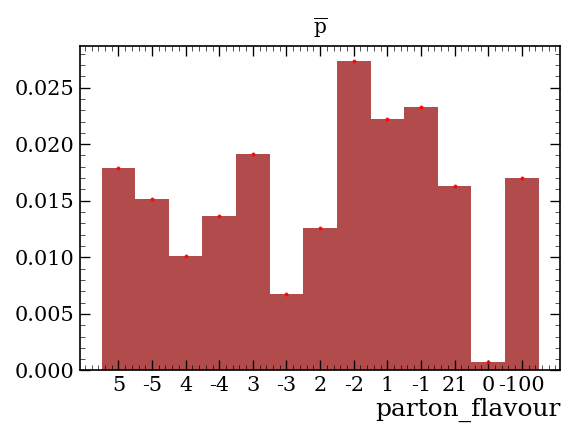

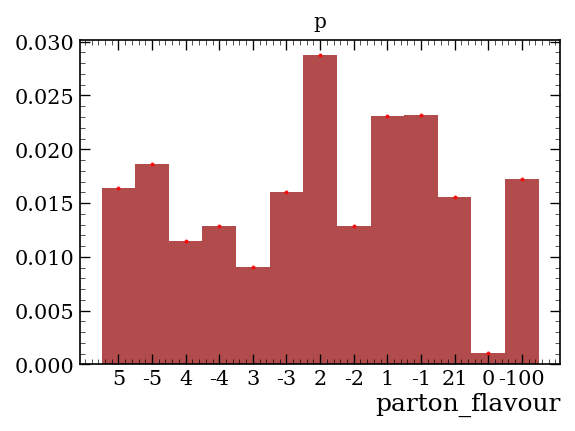

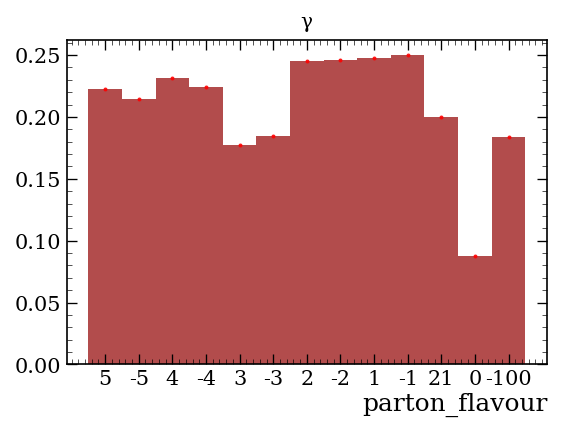

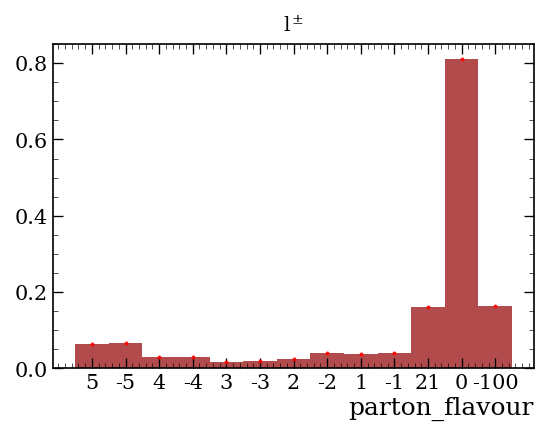

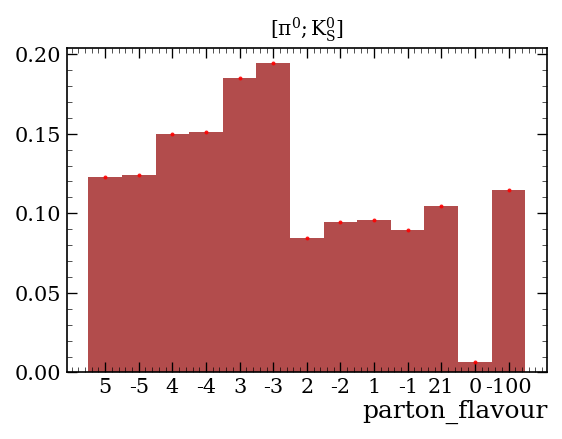

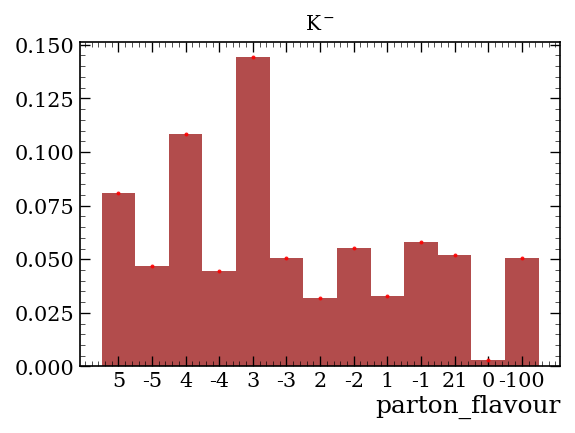

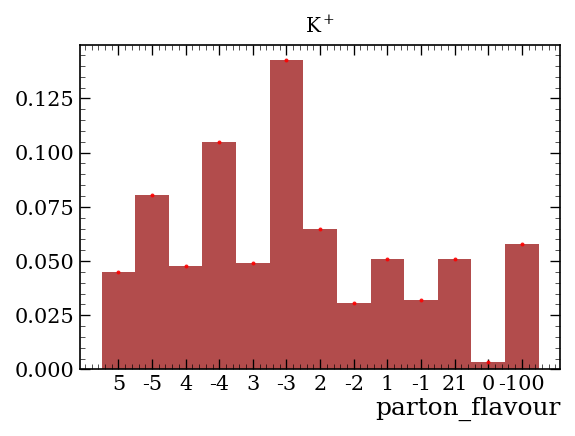

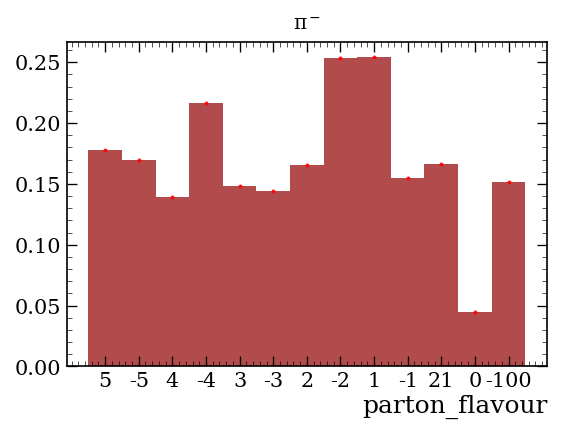

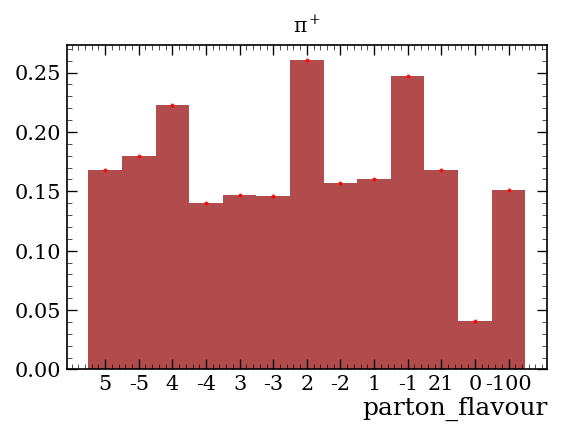

In [131]:
for histii in hist_stack:
    fig, ax = plt.subplots();
#     fig = plt.figure()
    colors=plt.rcParams['axes.prop_cycle'].by_key()['color']
#     hep.histplot(yvals, edges, yerr=np.sqrt(yvals), histtype='fill', alpha=0.6, linewidth=1.0, ax=ax, color=colors[0])
#     hep.histplot(yvals, edges, yerr=np.sqrt(yvals), histtype='errorbar', marker=".", markersize=0.2, alpha=0.9, linewidth=1.0, ax=ax, color=colors[0])
    ax.set_title(histii.name)
    histii.plot(histtype="fill", alpha=0.7, linewidth=1.0, ax=ax, color=colors[0]);
    histii.plot(histtype="errorbar", markersize=3.8, alpha=0.9, linewidth=30.0, ax=ax, color='red',capsize=2.0, capthick=0.7);
    hist_name = histii.name
    hist_name+='' if Py else '_Her'
    fig.savefig(figdir+hist_name+'.png')
    fig.savefig(figdir+hist_name+'.pdf')
    print("Figure saved = ", figdir+hist_name+'.png')
1;

In [26]:
with open("hadrons/Pythia.pkl", "rb") as f:
    h_PYT = pickle.load(f)

with open("hadrons/Herwig.pkl", "rb") as f:
    h_HER = pickle.load(f)

# with open("hadrons/Herwig_good_jets.pkl", "rb") as f:
#     h_H_good = pickle.load(f)

# with open("hadrons/Herwig_bad_jets.pkl", "rb") as f:
#     h_H_bad = pickle.load(f)
    
# with open("hadrons/Pythia_good_jets.pkl", "rb") as f:
#     h_H_good = pickle.load(f)

# with open("hadrons/Pythia_bad_jets.pkl", "rb") as f:
#     h_P_bad = pickle.load(f)
    
# h_PYT = h_P_bad
# h_HER = h_H_bad

In [16]:
my_stack = {}
cat_keys = categories.keys()
for key in cat_keys:
#     complex_cat = map(lambda a: complex(a)*1j, [3112, 3122])
    complex_cat = [complex(valii)*1j for valii in categories[key]]
    hist_cat = h_PYT[complex_cat,:].project('parton_flavour')
    my_stack[key] = hist_cat
    
hist_stack_PYT = hist.Stack.from_dict(my_stack)

# s = h[:,:].stack("had_type")
s = hist_stack_PYT
sumVals = h_PYT[sum,:].values()
sumVals[sumVals==0] = 1
# s*norms
for ii in range(len(s)):
#     hist_scale = s[ii].sum()
    hist_scale= 1/sumVals
    s[ii] = s[ii]*hist_scale # if hist_scale!=0 else s[ii];
#     print("scaled sum = ", s[ii].sum())

hist_stack_PYT = s

/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


In [17]:
my_stack = {}
cat_keys = categories.keys()
for key in cat_keys:
#     complex_cat = map(lambda a: complex(a)*1j, [3112, 3122])
    complex_cat = [complex(valii)*1j for valii in categories[key]]
    hist_cat = h_HER[complex_cat,:].project('parton_flavour')
    my_stack[key] = hist_cat
    
hist_stack_HER = hist.Stack.from_dict(my_stack)

# s = h[:,:].stack("had_type")
s = hist_stack_HER
sumVals = h_HER[sum,:].values()
sumVals[sumVals==0] = 1
# s*norms
for ii in range(len(s)):
#     hist_scale = s[ii].sum()
    hist_scale= 1/sumVals
    s[ii] = s[ii]*hist_scale # if hist_scale!=0 else s[ii];
#     print("scaled sum = ", s[ii].sum())
hist_stack_HER = s

In [18]:
plt.rcParams['figure.subplot.top'] = 0.94
plt.rcParams['figure.subplot.right'] = 0.98
plt.rcParams['figure.subplot.left'] = 0.19

In [4]:
import os
figdir = 'fig/hadrons/Her7_Py8_bad_jets/'
if not os.path.exists(figdir):
    os.mkdir(figdir)

# fig, ax = plt.subplots();
for histP, histH in zip(hist_stack_PYT, hist_stack_HER):
    fig, ax = plt.subplots();
#     fig = plt.figure()
    ax.set_title(histP.name)
    arts1 = histP.plot1d(ax=ax, alpha=0.6, linewidth=2, label='P8, bad jets');
    ax.set_prop_cycle(None)
    mc = next(ax._get_lines.prop_cycler)
    arts2 = histH.plot1d(ax=ax, alpha=0.6, linewidth=2, label='H7, bad jets');
    arts1[0][0].set_hatch(8*'/')
    arts2[0][0].set_hatch(8*'\\')
    ax.set_ylabel("Energy fraction")
#     ax.set_ylim(0,0.04)
    ax.legend()
    
    print(f'Fig saved under {figdir+histP.name+".p*"}')
#     if 'protons' in histP.name:
    if True:
        print("Saved")
        fig.savefig(figdir+histP.name+'.png')
        fig.savefig(figdir+histP.name+'.pdf')
1;

NameError: name 'hist_stack_PYT' is not defined

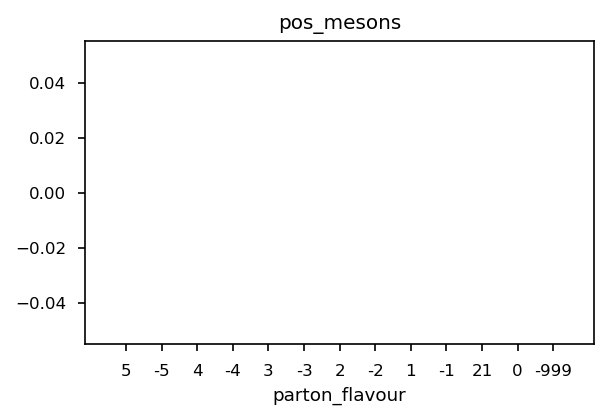

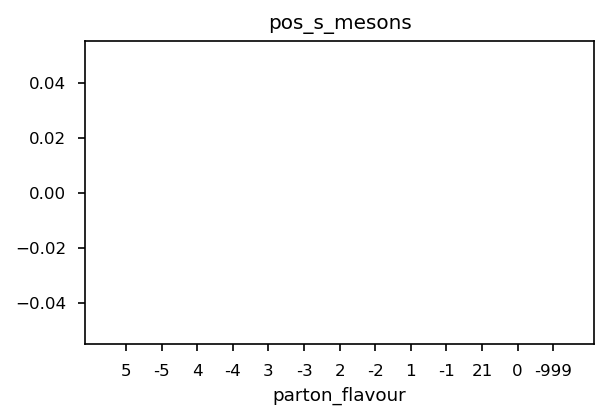

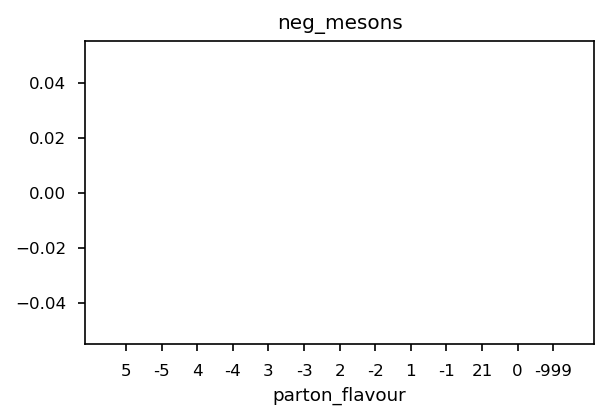

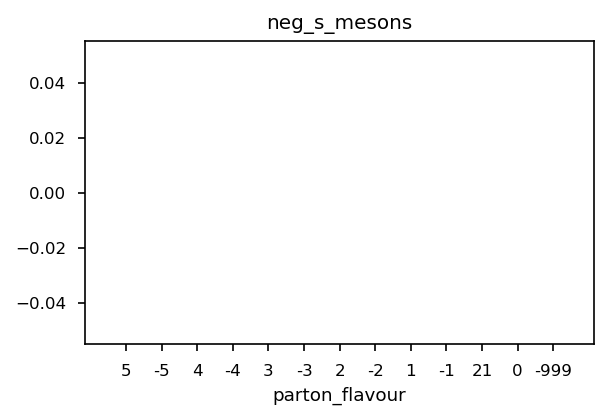

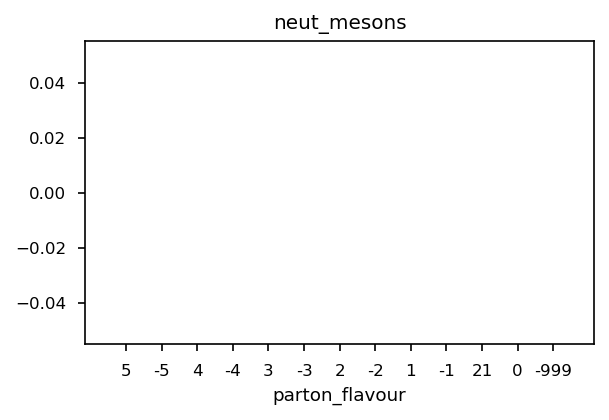

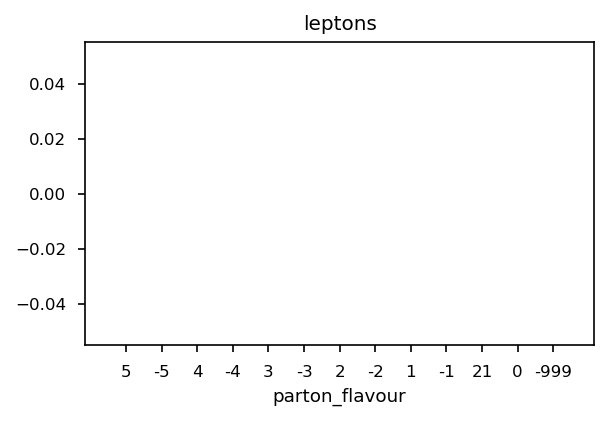

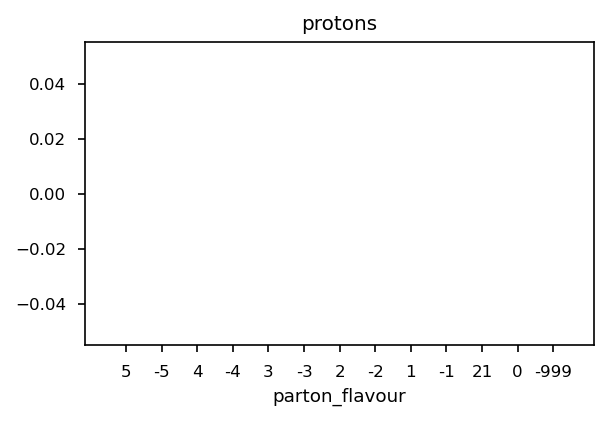

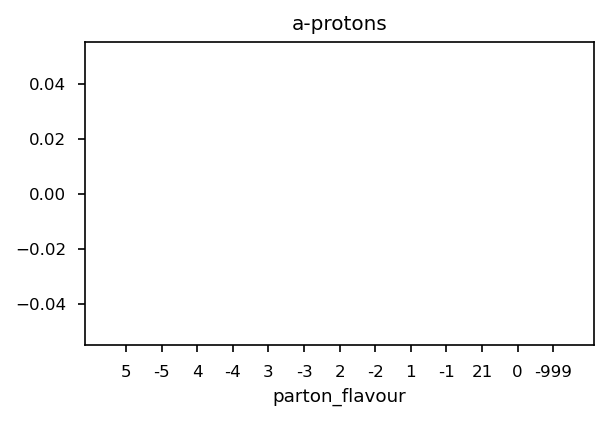

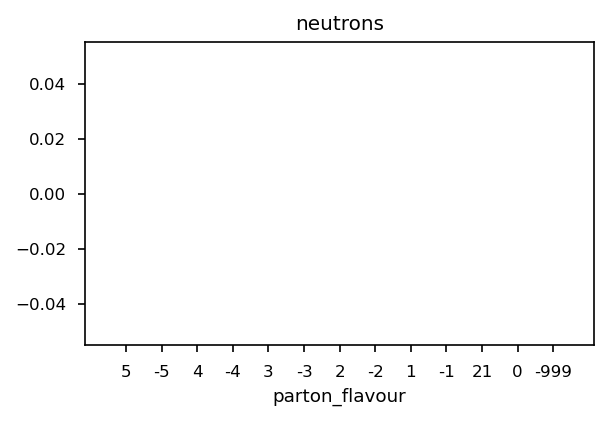

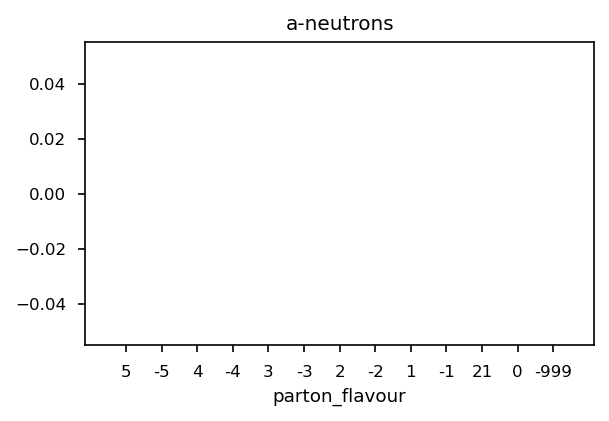

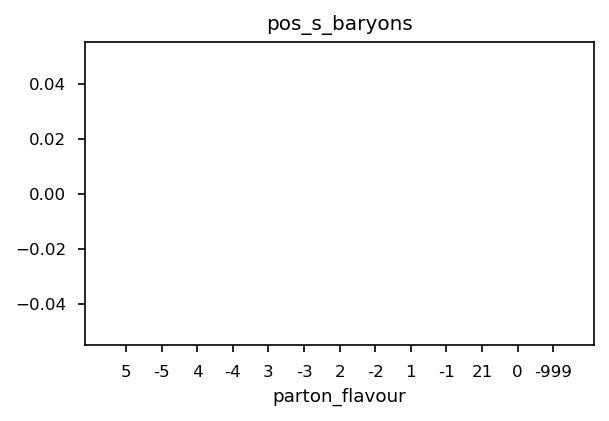

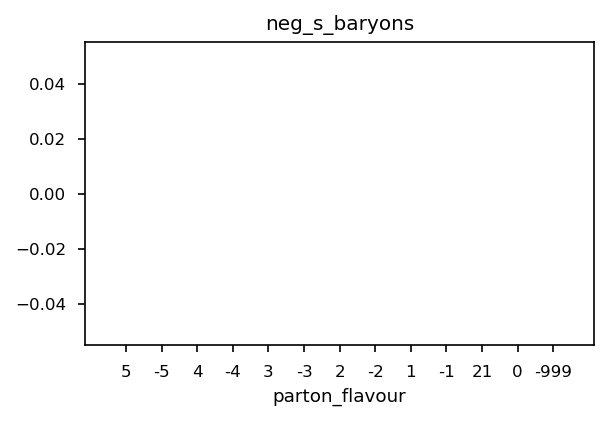

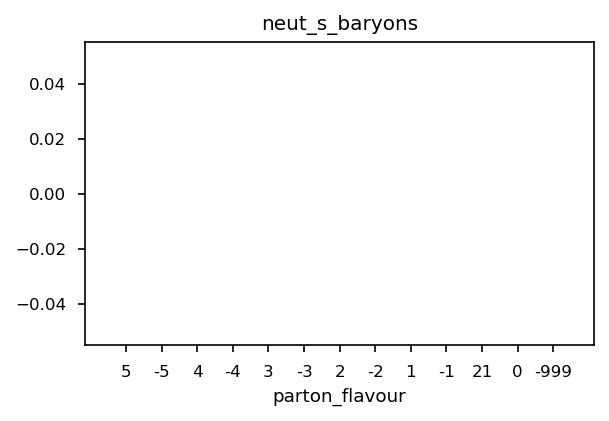

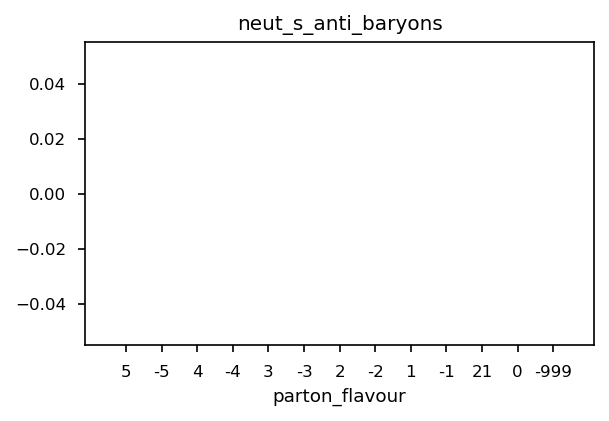

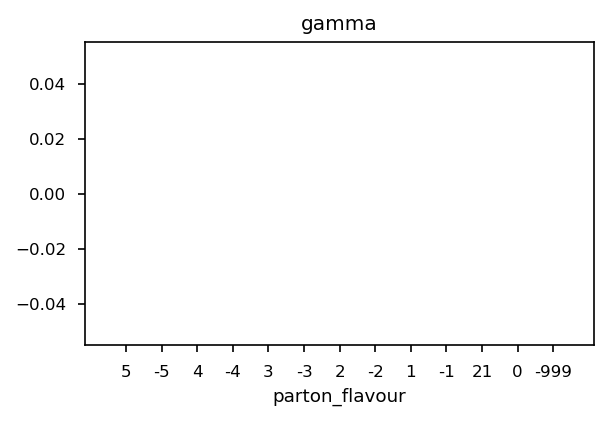

In [36]:
# fig, ax = plt.subplots();

for histii in hist_stack:
    fig, ax = plt.subplots();
#     fig = plt.figure()
    ax.set_title(histii.name)
    histii.plot(ax=ax, histtype="fill");
#     fig.savefig(figdir+histii.name+'.png')
#     fig.savefig(figdir+histii.name+'.pdf')
1;

In [19]:
pltStyle(style='paper')
plt.rcParams['figure.subplot.left'] = 0.172
plt.rcParams['figure.dpi'] = 150

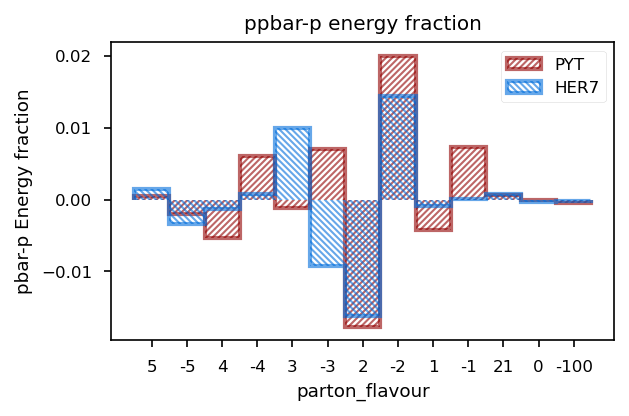

In [40]:
p_pbar_PYT = hist_stack_PYT[7] - hist_stack_PYT[6] 
p_pbar_HER = hist_stack_HER[7] - hist_stack_HER[6]

fig, ax = plt.subplots();
#     fig = plt.figure()
ax.set_title("ppbar-p energy fraction")
p_pbar_PYT.plot(ax=ax, alpha=0.6, hatch=8*'/', linewidth=2, label='PYT')
p_pbar_HER.plot(ax=ax, alpha=0.6, hatch=8*'\\', linewidth=2, label='HER7')
# histP.plot(ax=ax, alpha=0.6, hatch=8*'/', linewidth=2, label='PYT');
# histH.plot(ax=ax, alpha=0.6, hatch=8*'\\', linewidth=2, label='HER7');
ax.set_ylabel("pbar-p Energy fraction")
# ax.set_ylim(0,0.04)
ax.legend()

fig.savefig(figdir+'p-pbar_E_fract'+'.png')
fig.savefig(figdir+'p-pbar_E_fract'+'.pdf')

1;

In [41]:
hist_stack_PYT[8]

Hist(IntCategory([5, -5, 4, -4, 3, -3, 2, -2, 1, -1, 21, 0, -100], name='parton_flavour'), storage=Double()) # Sum: 0.21117579601824127

In [45]:
hist_stack_PYT

Stack<('pos_mesons', 'pos_s_mesons', 'neg_mesons', 'neg_s_mesons', 'neut_mesons', 'leptons', 'protons', 'a-protons', 'neutrons', 'a-neutrons', 'pos_s_baryons', 'neg_s_baryons', 'neut_s_baryons', 'neut_s_anti_baryons', 'gamma') of Hist(IntCategory([5, -5, 4, -4, 3, -3, 2, -2, 1, -1, 21, 0, -100], name='parton_flavour'), storage=Double()) # Sum: 2.2408688246525834>

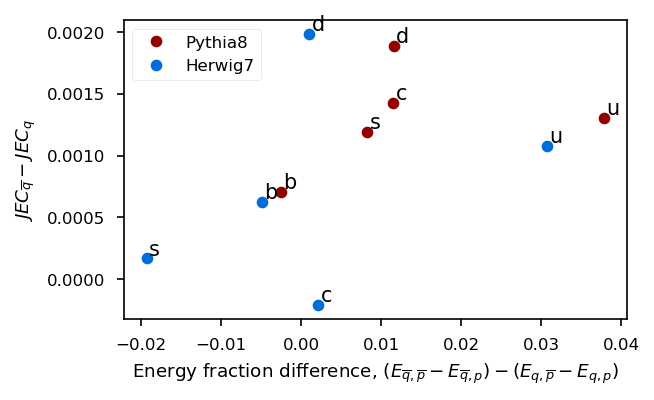

In [57]:
hist_counts = (hist_stack_PYT[7] - hist_stack_PYT[6]).counts()[:-3] #.counts()[:-3][::2] - hist_stack_PYT[-1].counts()[:-3][1::2]
hist_counts_HER = (hist_stack_HER[7] - hist_stack_HER[6]).counts()[:-3] #.counts()[:-3][::2] - hist_stack_HER[-1].counts()[:-3][1::2]

# hist_counts = (hist_stack_PYT[9] - hist_stack_PYT[8] + hist_stack_PYT[7] - hist_stack_PYT[6]).counts()[:-3] #.counts()[:-3][::2] - hist_stack_PYT[-1].counts()[:-3][1::2]
# hist_counts_HER = (hist_stack_HER[9] - hist_stack_HER[8] + hist_stack_HER[7] - hist_stack_HER[6]).counts()[:-3] #.counts()[:-3][::2] - hist_stack_HER[-1].counts()[:-3][1::2]


# hist_counts = (hist_stack_PYT[-1]).counts()[:-3] #.counts()[:-3][::2] - hist_stack_PYT[-1].counts()[:-3][1::2]
# hist_counts_HER = (hist_stack_HER[-1]).counts()[:-3]

# A = (hist_stack_PYT[-1] +  ## gamma
#     hist_stack_PYT[-3] +  ## neutral strange baryib
#     hist_stack_PYT[8]) ## neutron )



# hist_counts = p_pbar_PYT.counts()[:-3]
# hist_counts_HER = p_pbar_HER.counts()[:-3]
# data from https://docs.google.com/spreadsheets/d/19pppO8W6qkbEegLJ_nZanIrZPjgm0aDLrGE1eOx6Vgo/edit#gid=0 
#inclusive
jet_resp_PY = np.array([0.9791690, 1.0084885, 1.0121759, 1.0321773, 1.0365316])
a_jet_resp_PY = np.array([0.9799008, 1.0097034, 1.0132453, 1.033988, 1.0410919])

#-1.3<eta<1.3
# jet_resp_PY2 = np.array([0.9836225, 1.0083263, 1.0065695, 1.0296371, 1.0361795])
# a_jet_resp_PY2 = np.array([0.9843285, 1.0097533, 1.0077573, 1.0309398, 1.0380630])

#-1.3<eta<1.3
# jet_resp_HER   = np.array([0.9810468, 0.9988879, 1.0000866, 1.0268466, 1.0243336])
# a_jet_resp_HER = np.array([0.9819082, 0.9987163, 1.0001530, 1.0272993, 1.0252209])


#inclusive
jet_resp_HER   = np.array([0.9777951, 0.9989399, 1.0055787, 1.0294850, 1.0266134])
a_jet_resp_HER = np.array([0.9784210, 0.9987334, 1.0057483, 1.0305593, 1.0285962])

# jet_resp_PY2 = np.array([0.9836225, 1.0083263, 1.0065695, 1.0361795, 1.0296371])
# a_jet_resp_PY2 = np.array([0.9843285, 1.0097533, 1.0077573, 1.0380630, 1.0309398])

# jet_resp_HER = np.array([0.9810468, 0.9988879, 1.0000866, 1.0243336, 1.0268466])
# a_jet_resp_HER = np.array([0.9819082, 0.9987163, 1.0001530, 1.0252209, 1.0272993])


txts = ["b", "c", "s", "u", "d"]



# hist_counts[::2]
fig, ax = plt.subplots();
# ax.plot(hist_counts[1::2] - hist_counts[::2], a_jet_resp_PY-jet_resp_PY, 'o')
ax.plot(hist_counts[1::2] - hist_counts[::2], a_jet_resp_PY2-jet_resp_PY2, 'o', label="Pythia8")
ax.plot(hist_counts_HER[1::2] - hist_counts_HER[::2], a_jet_resp_HER-jet_resp_HER, 'o', label="Herwig7")
for ii in range(len(txts)):
    ax.text((hist_counts[1::2] - hist_counts[::2])[ii]+0.0003, (a_jet_resp_PY2-jet_resp_PY2)[ii]+0.00003, txts[ii])
    ax.text((hist_counts_HER[1::2] - hist_counts_HER[::2])[ii]+0.0003, (a_jet_resp_HER-jet_resp_HER)[ii]+0.00003, txts[ii])
# ax.plot(hist_counts[1::2], , 'o')
# ax.plot((hist_stack_PYT[6]).counts()[:-3][::2], jet_resp_PY, 'o')
# ax.plot((hist_stack_PYT[6]).counts()[:-3][1::2], a_jet_resp_PY, 'o')

ax.set_xlabel("Energy fraction difference, $(E_{\overline{q},\overline{p}} - E_{\overline{q},p}) - (E_{q,\overline{p}} - E_{q,p})$")
ax.set_ylabel("$JEC_{\overline{q}} - JEC_{q}$")

ax.legend()
fig.savefig(figdir+'pbar-p_JERC_relation3'+'.png')
fig.savefig(figdir+'pbar-p_JERC_relation3'+'.pdf')
1;

[0.99749175 1.01156164 1.00823572 1.03847633 1.01160588]
[1.0007178, 1.0014153, 1.00118, 1.0012652, 1.0018177]


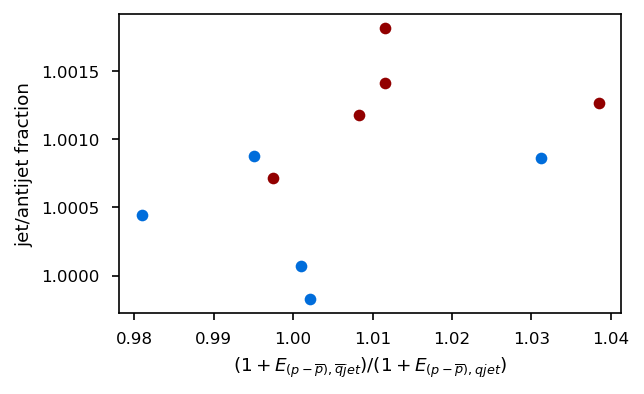

In [54]:
hist_counts = p_pbar_PYT.counts()[:-3]
bla = (1+hist_counts[1::2])/(1+hist_counts[::2])
print(bla)
ajet = [1.0007473, 1.0012046, 1.0010565, 1.0017543, 1.0043996]
ajet = [1.0007178, 1.0014153, 1.0011800, 1.0012652, 1.0018177]
print(ajet)

fig, ax = plt.subplots();
ax.set_xlabel("$(1+ E_{(p-\overline{p}), \overline{q} jet})/(1+E_{(p-\overline{p}),q jet})$")
ax.set_ylabel("jet/antijet fraction")

ax.plot(bla, ajet, 'o')

hist_counts = p_pbar_HER.counts()[:-3]
bla = (1+hist_counts[1::2])/(1+hist_counts[::2])
bla
ajet = [1.0006401, 0.9997933, 1.0001687, 1.0010435, 1.0019314]
ajet = [1.0008780, 0.9998282, 1.0004409, 1.0008662, 1.0000664]
ajet

ax.plot(bla, ajet, 'o')
1;